# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

In [464]:
import pandas as pd

### Откройте файл с данными и изучите общую информацию

In [465]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [466]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

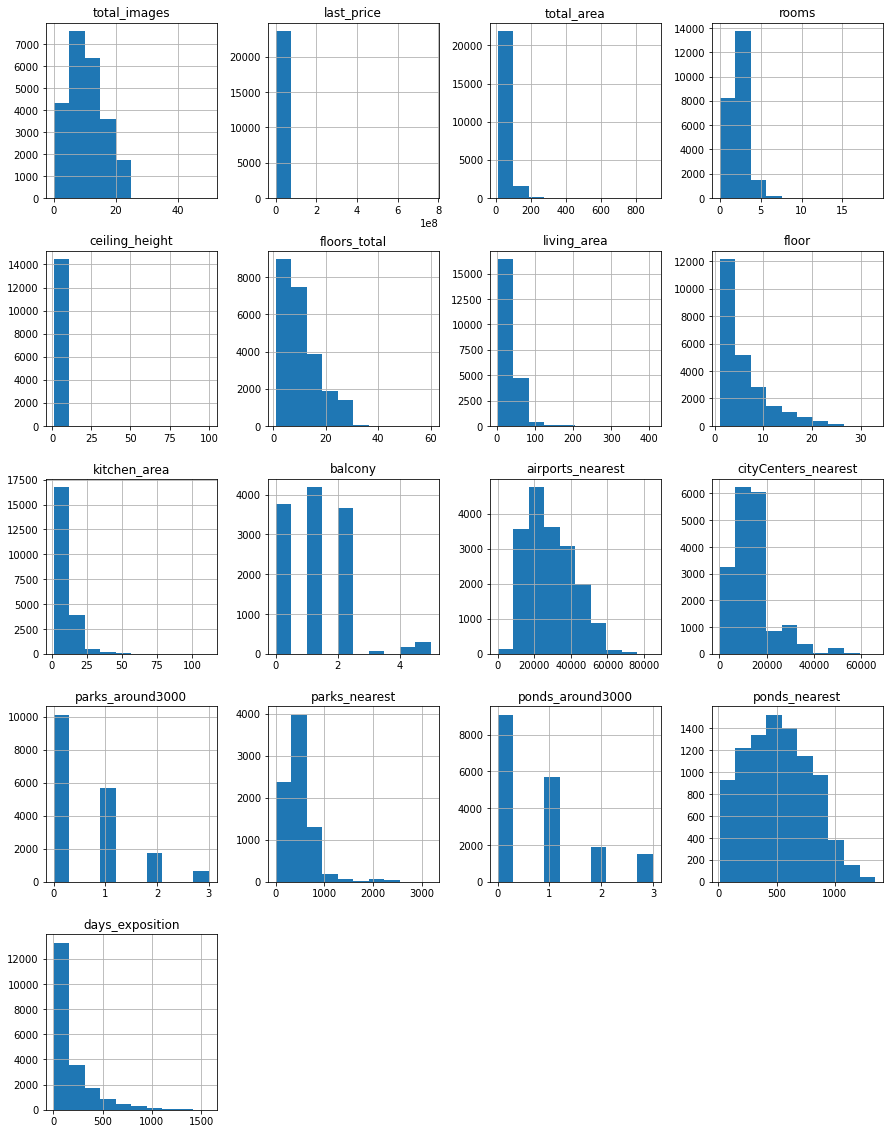

In [468]:
df.hist(figsize=(15, 20));

#### Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- city_сenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент публикации
- living_area — жилая площадь (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры (м²)
- total_images — число фотографий квартиры в объявлении

### Выполните предобработку данных

In [469]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Пропуски и выбросы

In [470]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Ошибки данных:
- airports_nearest — нулевые значения, выбросы
- balcony — нулевые значения, тип данных
- ceiling_height — нулевые значения, выбросы
- city_сenters_nearest — нулевые значения
- days_exposition — нулевые значения, тип данных
- first_day_exposition — нулевые значения
- floor — выбросы
- floors_total — нулевые значения, тип данных
- is_apartment — нулевые значения, тип данных
- kitchen_area — нулевые значения, выбросы
- last_price — выбросы
- living_area — нулевые значения, выбросы
- locality_name — нулевые значения, дубликаты
- open_plan —
- parks_around3000 — нулевые значения, тип данных
- parks_nearest — нулевые значения
- ponds_around3000 — нулевые значения, тип данных
- ponds_nearest — нулевые значения
- rooms — выбросы
- studio — 
- total_area — выбросы

Все пропущенные значения заменим на False, так как апартаменты появились относительно недавно.

In [471]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Для следующих характеристик будем считать, что пропущенные значения обусловлены их отсутствием в реальной жизни.

In [472]:
df['balcony'] = df['balcony'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)

Проверим floors_total на выбросы. 87-этажный небоскрёб Лахта-центр в Санкт-Петербурге является самым высоким жилым небоскребом в Питере. Следовательно, не должно быть данных выше него.

In [473]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Максимум 60этажный небоскреб. Минимум 1этажный домик. Выбросов нет.

<AxesSubplot:>

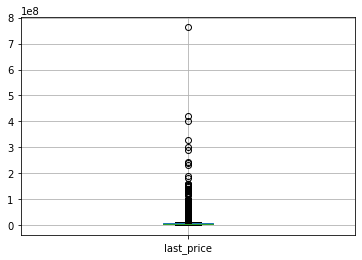

In [474]:
df.boxplot('last_price')

Проверим last_price на выбросы. Самая дорогая квартира Питера стоит 1 млрд рублей (на 2021 год). Следовательно, не должно быть данных дороже неё. Самая дешёвая квартира в Питере стоит 135 тысяч рублей (на 2023 год). Следовательно, не должно быть данных дешевле неё.

In [475]:
print('Квартир стоимостью меньше 135.000:', df.query('last_price <= 1.35e+05')['last_price'].count())

Квартир стоимостью меньше 135.000: 1


In [476]:
df.drop(index=df.query('last_price <= 1.35e+05').index, inplace=True)

In [477]:
df['last_price'].describe()

count    2.369800e+04
mean     6.541824e+06
std      1.088716e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Квартира, которая стоит меньше 135.000 рублей, является выбросом, поэтому она удалена. Все остальные квартиры не превышают миллиарда, оставляем.

In [478]:
df['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

В total_area нет квартир площадью меньше 10 кв.м., но есть меньше 20. Но такие размеры допустимы.
Квартиры со слишком большой площадью более 500 кв.м. похожи на элитную недвижимость.

In [479]:
print('Квартир площадью менее 10 кв.м.:', df.query('total_area < 10')['total_area'].count()) 
print('Квартир площадью более 500 кв.м.:', df.query('total_area > 500')['total_area'].count())

Квартир площадью менее 10 кв.м.: 0
Квартир площадью более 500 кв.м.: 7


In [480]:
df['rooms'].describe()

count    23698.000000
mean         2.070639
std          1.078428
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Проверим, не получилось ли так, что студия или апартаменты имеют комнаты. Удалим найденное.

In [481]:
print('Квартиры-студии с комнатами:', df.query('rooms != 0 and studio')['rooms'].count())
df.drop(index=df.query('rooms != 0 and studio').index, inplace=True)
print('Квартиры-студии с комнатами (после очистки):', df.query('rooms != 0 and studio')['rooms'].count()) 

Квартиры-студии с комнатами: 11
Квартиры-студии с комнатами (после очистки): 0


Посмотрим на значения ceiling_height. Видно, что много выбросов, так как потолок не может быть 30 или 100 м высотой.

In [482]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

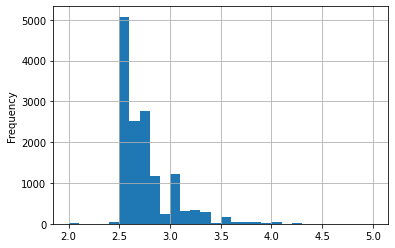

In [483]:
df['ceiling_height'].sort_values().plot(y='ceiling_height', kind='hist', bins=30, grid=True, range=(2,5));

Высота потолков устанавливается СНиПом. Независимо от года постройки и от типа здания, высота потолка должна быть в пределах 2,5-3,2м.
На рынке недвижимости существует небольшое количество двухэтажнх пентхаусов с высотой потолков 4-5м. Можно предположить, что квартиры с высотой потолков 5-50м на самом деле являются опечаткой и соотвествуют 2.5-5м. Исходя их этого предполагаем, что все квартиры с высотой потолков от 50м являются выбросами.

In [484]:
df.update(df[(df['ceiling_height'] > 5) & (df['ceiling_height'] <= 50)]['ceiling_height'] / 10)
df.drop(index=df.query('ceiling_height > 5').index, inplace=True)
df.drop(index=df.query('ceiling_height < 2.5').index, inplace=True)

In [485]:
df['ceiling_height'].describe()

count    14408.000000
mean         2.727184
std          0.270942
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

Вопрос с выбросами решен. Заполним пропуски ceiling_height медианным значением высоты среди домов с таким же количеством этажей, так как обычно такие дома строятся по одному стандарту. Аналогично заполним пропуски и для floors_total. Составим сводные таблицы для этого.

In [486]:
print(df['ceiling_height'].isna().sum())

9189


In [487]:
ceiling_medians = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

,median,count
floors_total,,
1.0,2.90,8
2.0,2.70,211
3.0,2.80,398
4.0,3.00,787
5.0,2.55,3626


In [488]:
for floor in ceiling_medians.index:
    df.loc[(df['ceiling_height'].isna()) & (~df['floors_total'].isna()), 'ceiling_height'] = ceiling_medians.loc[floor, 'median']

In [489]:
print(df['ceiling_height'].isna().sum())

77


Количество пропусков значительно уменьшилось.

In [490]:
df['living_area'].describe()

count    21702.000000
mean        34.460618
std         22.003941
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

В living_area есть квартиры с жилой площадью меньше 10 кв.м. Данные по Питеру, а не по Гонконгу, поэтому квартиры с жилой площадью меньше 10 кв.м. считаем выбросами. Также проверим не привысила ли жилая площадь общую площадь квартиры.

In [491]:
print('Жилая площадь меньше 10 кв.м.: ', df.query('living_area < 10')['living_area'].count())
df.drop(index=df.query('living_area < 10').index, inplace=True)
print('Жилая площадь меньше 10 кв.м.: ', df.query('living_area < 10')['living_area'].count())

print('Жилая площадь больше общей: ', df.query('living_area > total_area')['living_area'].count())

Жилая площадь меньше 10 кв.м.:  25
Жилая площадь меньше 10 кв.м.:  0
Жилая площадь больше общей:  0


In [492]:
df['floor'].describe()

count    23572.000000
mean         5.892542
std          4.886453
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

В floor нет нулевых значений и слишком больших значений. Но надо проверить есть ли значения этажа больше максимального в здании.

In [493]:
print('Этаж больше количества этажей: ', df.query('floor > floors_total')['floor'].count())
df.drop(index=df.query('floor > floors_total').index, inplace=True)
print('Этаж больше количества этажей: ', df.query('floor > floors_total')['floor'].count())

Этаж больше количества этажей:  0
Этаж больше количества этажей:  0


In [494]:
df['kitchen_area'].describe()

count    21320.000000
mean        10.565369
std          5.886977
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

В kitchen_area есть квартиры с площадью кухни 1 кв. метра. Явно аномалия. Но кухони с площадью 5 кв.м уже норма, судя по количеству. Проверим, чтобы размер кухни не превышал размер квартиры.

In [495]:
print('Площадь кухни меньше 2 кв.м.: ', df.query('kitchen_area < 2')['living_area'].count())
print('Площадь кухни 5 кв.м.: ', df.query('kitchen_area == 5')['living_area'].count())
print('Площадь кухни больше общей: ', df.query('kitchen_area > total_area')['living_area'].count())

df.drop(index=df.query('kitchen_area < 2').index, inplace=True)

Площадь кухни меньше 2 кв.м.:  1
Площадь кухни 5 кв.м.:  352
Площадь кухни больше общей:  0


In [496]:
df['airports_nearest'].describe()

count    18068.000000
mean     28797.179489
std      12636.211042
min          0.000000
25%      18577.500000
50%      26726.000000
75%      37298.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Судя по гистограмме, минимальное расстояние до аэропорта - 5000 м. Поэтому квартиры рассположенные ближе или в самом аэропорту будем считать выбросами.

In [497]:
print('Квартир слишком близко к аэропорту:', df.query('airports_nearest < 5000')['airports_nearest'].count())
df.drop(index=df.query('airports_nearest < 5000').index,inplace=True)
print('Квартир слишком близко к аэропорту:', df.query('airports_nearest < 5000')['airports_nearest'].count())

Квартир слишком близко к аэропорту: 1
Квартир слишком близко к аэропорту: 0


#### Типы данных

ponds_around3000, parks_around3000, floors_total, days_exposition, balcony олицитворяют количество, следовательно, являются целыми числами. first_day_exposition необходим стандартный формат даты. is_apartment имеет бинарные значения, следовательно, должно иметь булевый тип.

In [498]:
try:
    df['ponds_around3000'] = df['ponds_around3000'].astype('int')
except:
    print('ponds_around3000 int type conversion failed')
    
try:
    df['parks_around3000'] = df['parks_around3000'].astype('int')
except:
    print('parks_around3000 int type conversion failed')
    
try:
    df['floors_total'] = df['floors_total'].astype('Int64')
except:
    print('floors_total int type conversion failed')
    
try:
    df['days_exposition'] = df['days_exposition'].astype('Int64')
except:
    print('days_exposition int type conversion failed')
    
try:
    df['balcony'] = df['balcony'].astype('int')
except:
    print('balcony int type conversion failed')

try:    
    df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
except:
    print('first_day_exposition to_datetime type conversion failed')
      
try:
    df['is_apartment'] = df['is_apartment'].map({'False':False, 'True':True})
except:
    print('is_apartment bool type conversion failed')

days_exposition int type conversion failed


#### Дубликаты

 Проверим наличие явных дубликатов

In [499]:
print('Количетво явных дубликатов:', df.duplicated().sum())

Количетво явных дубликатов: 0


Неявные дубликёаты могли появиться только в locality_name. Проверим

In [500]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Поменяем все "ё" на "е". Приведем всё к нижнему регистру. Заменим "городской поселок" на "поселок городского типа".

In [501]:
df['locality_name'] = df['locality_name'].str.lower()
print('Количество уникальных занчений locality_name:', df['locality_name'].unique().shape[0])
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
print('Количество уникальных занчений locality_name:', df['locality_name'].unique().shape[0])
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок городского типа')
print('Количество уникальных занчений locality_name:', df['locality_name'].unique().shape[0])

Количество уникальных занчений locality_name: 364
Количество уникальных занчений locality_name: 330
Количество уникальных занчений locality_name: 323


In [502]:
print('Количетво явных дубликатов:', df.duplicated().sum())

Количетво явных дубликатов: 0


Обновим индексацию после всех удалений

In [503]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23570 entries, 0 to 23569
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23570 non-null  int64         
 1   last_price            23570 non-null  float64       
 2   total_area            23570 non-null  float64       
 3   first_day_exposition  23570 non-null  datetime64[ns]
 4   rooms                 23570 non-null  int64         
 5   ceiling_height        23493 non-null  float64       
 6   floors_total          23484 non-null  Int64         
 7   living_area           21675 non-null  float64       
 8   floor                 23570 non-null  int64         
 9   is_apartment          0 non-null      object        
 10  studio                23570 non-null  bool          
 11  open_plan             23570 non-null  bool          
 12  kitchen_area          21318 non-null  float64       
 13  balcony         

### Добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [504]:
df['cost_per_sqm'] = round(df['last_price'] / df['total_area'], 2)

День публикации объявления (0 - понедельник, 1- вторник и т.д.)

In [505]:
df['dayofweek'] = df['first_day_exposition'].dt.dayofweek

Месяц публикации объявления

In [506]:
df['month'] = df['first_day_exposition'].dt.month

Год публикации объявления

In [507]:
df['year'] = df['first_day_exposition'].dt.year

Тип этажа квартиры (значения - "первый", "последний", "другой")

In [508]:
df['floor_category'] = df.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total, int) 
    else 'другой'), axis=1
)

Расстояние до центра города в километрах

In [509]:
df['city_centers_nearest_km'] = round(df['city_centers_nearest'] / 1000)
df['city_centers_nearest_km'] =  df['city_centers_nearest_km'].astype('Int32')

In [510]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'cost_per_sqm', 'dayofweek',
       'month', 'year', 'floor_category', 'city_centers_nearest_km'],
      dtype='object')

In [511]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floor_category,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.90,11,18.6,1,NaN,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.90,5,34.3,4,NaN,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.90,14,NaN,9,NaN,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8


В самом начале работы с данными были описаны найденные ошибки в датасете. Пройдемся по каждой из них:
Ошибки данных:
- airports_nearest — удалены выбросы
- balcony — пропуски заполнены 0, тип данных - int64
- ceiling_height — нулевые значения заполнены медианным значением по домам с одинаковым количеством этажей, удалены выбросы
- days_exposition — тип данных - int64
- first_day_exposition — тип данных - datetime64
- floor — выбросы не найдены
- floors_total — тип данных - int64
- is_apartment — пропуски заполнены False, тип данных - bool
- kitchen_area — удалены выбросы
- last_price — удалены выбросы
- living_area — удалены выбросы
- locality_name — данные преобразованы к одному формату, удалены дубликаты
- parks_around3000 — пропуски заполнены 0, тип данных - int64
- ponds_around3000 — пропуски заполнены 0, тип данных - int64
- rooms — удалены логические ошибки (в студии несколько комнат)
- total_area — удалены выбросы

Оставлены нулевые значения в следующих столбцах:
- airports_nearest
- city_сenters_nearest
- parks_nearest
- ponds_nearest
- floors_total
- kitchen_area
- living_area
- locality_name

В датасет добавлены 6 новых признаков:
- cost_per_sqm - цена одного квадратного метра
- dayofweek - день публикации объявления (0 - понедельник, 1- вторник и т.д.)
- month - месяц публикации объявления
- year - год публикации объявления
- floor_category - тип этажа квартиры (значения - "первый", "последний", "другой")
- city_centers_nearest_km - расстояние до центра города в километрах

### Проведите исследовательский анализ данных

#### Общая площадь квартиры

count    23570.000000
mean        60.381588
std         35.562956
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

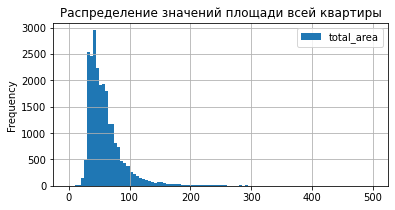

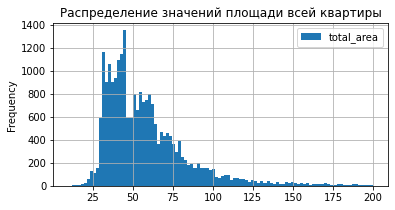

In [512]:
df.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0,500), title='Распределение значений площади всей квартиры')
df.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(6,3), range=(10,200), title='Распределение значений площади всей квартиры')
df['total_area'].describe()

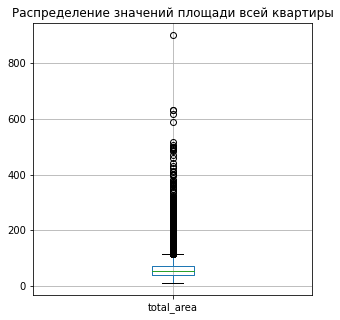

In [513]:
df.boxplot('total_area', figsize=(5, 5)).set_title('Распределение значений площади всей квартиры');

Площади квартиры варьируются от 12 кв.м. до 900 кв.м. Причем квартиры по площади больше 500 кв.м. встречаются редко, видимо, являются элитной недвижимостью и имеют соответствующие высокие цены по last_price. Напоминает Пуассоновское распределение. Значение в 900 кв.м. сильно выбивается из общих значений, поэтому лучше ограничиться 700 кв.м.

In [514]:
df.drop(index=df.query('total_area > 700').index, inplace=True)
df['total_area'].describe()

count    23569.000000
mean        60.345965
std         35.140639
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        631.200000
Name: total_area, dtype: float64

#### Жилая площадь квартиры

count    21674.000000
mean        34.475982
std         21.850056
min         10.000000
25%         18.600000
50%         30.000000
75%         42.400000
max        409.000000
Name: living_area, dtype: float64

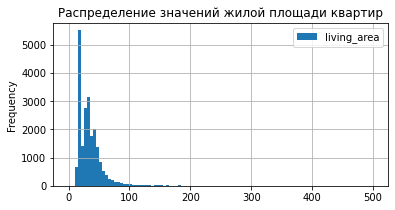

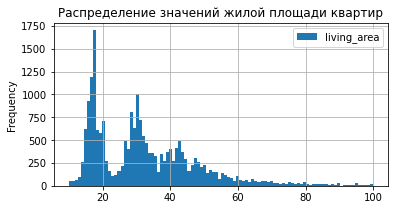

In [515]:
df.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0,500), title='Распределение значений жилой площади квартир')
df.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(6,3), range=(10,100), title='Распределение значений жилой площади квартир')
df['living_area'].describe()

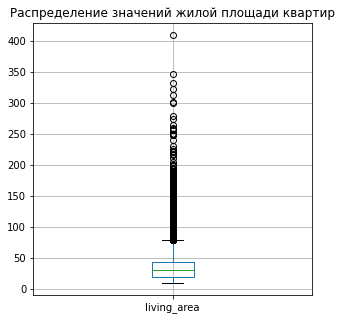

In [516]:
df.boxplot('living_area', figsize=(5, 5)).set_title('Распределение значений жилой площади квартир');

Значения жилой площади варьируются от 10 кв.м. до 409 кв.м. По графику видно, что значения больше 340 сильно выбиваются из общих данных. Будем считать их выбросами и удалим.

In [517]:
df.drop(index=df.query('living_area > 340').index,inplace=True)
df['living_area'].describe()

count    21672.000000
mean        34.444257
std         21.598008
min         10.000000
25%         18.600000
50%         30.000000
75%         42.332500
max        332.000000
Name: living_area, dtype: float64

#### Площадь кухни

count    21315.000000
mean        10.556386
std          5.813068
min          2.000000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

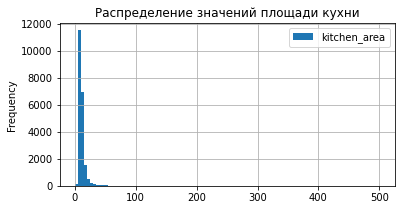

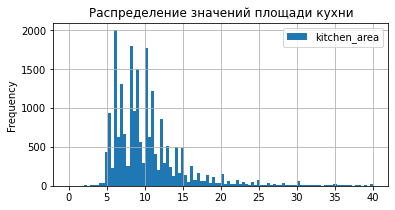

In [518]:
df.plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0,500), title='Распределение значений площади кухни')
df.plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0,40), title='Распределение значений площади кухни')
df['kitchen_area'].describe()

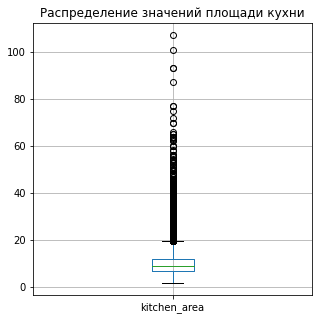

In [519]:
df.boxplot('kitchen_area', figsize=(5, 5)).set_title('Распределение значений площади кухни');

Занчения площадей кухни варьируются от 2 до 107. Выбросы не найдены. 

#### Цена объекта

count    2.356700e+04
mean     6.511172e+06
std      1.046399e+07
min      4.300000e+05
25%      3.430000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

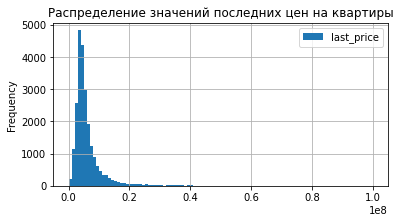

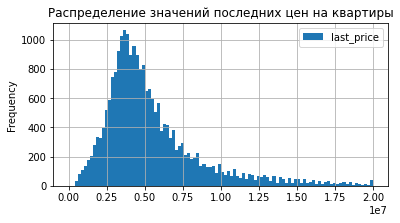

In [520]:
df.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0, 100000000), title='Распределение значений последних цен на квартиры')
df.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0, 20000000), title='Распределение значений последних цен на квартиры')
df['last_price'].describe()

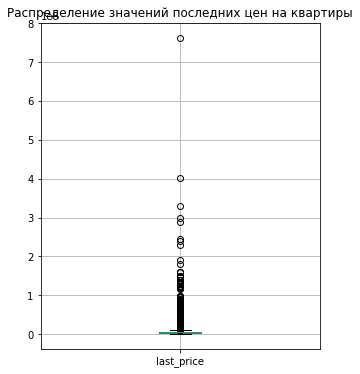

In [521]:
df.boxplot('last_price', figsize=(5, 6)).set_title('Распределение значений последних цен на квартиры');

Значения варьируются от 400.000 до 700.000.000. Судя по графику значения больше 350.000.000 являются аномалией. Избавимся от них.

In [522]:
df.drop(index=df.query('last_price > 350000000').index,inplace=True)
df['last_price'].describe()

count    2.356500e+04
mean     6.462316e+06
std      8.865766e+06
min      4.300000e+05
25%      3.430000e+06
50%      4.650000e+06
75%      6.800000e+06
max      3.300000e+08
Name: last_price, dtype: float64

#### Количество комнат

count    23565.000000
mean         2.070359
std          1.072277
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

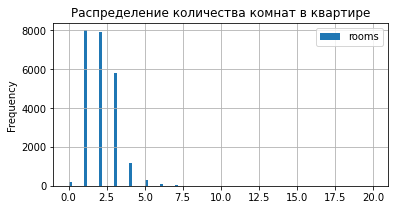

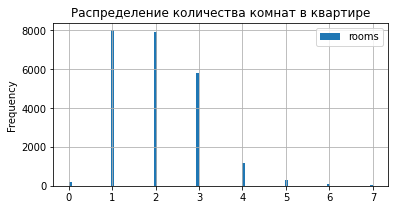

In [523]:
df.plot(y='rooms', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0, 20), title='Распределение количества комнат в квартире')
df.plot(y='rooms', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0, 7), title='Распределение количества комнат в квартире')
df['rooms'].describe()

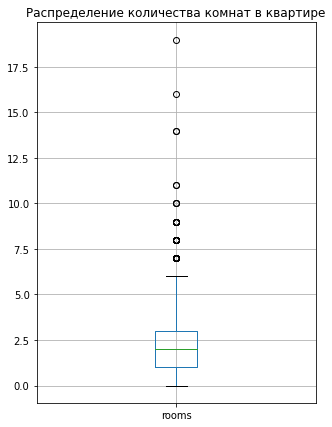

In [524]:
df.boxplot('rooms', figsize=(5, 7)).set_title('Распределение количества комнат в квартире');

Количетсво комнат является целым значением и варьируется от 0 до 19. Судя по графикам, значения больше 12 являются аномалией. Уберем их. 

In [525]:
df.drop(index=df.query('rooms > 12').index,inplace=True)
df['rooms'].describe()

count    23561.000000
mean         2.068036
std          1.057111
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

#### Высота потолков

count    23484.000000
mean         2.793986
std          0.227837
min          2.500000
25%          2.600000
50%          2.900000
75%          2.900000
max          5.000000
Name: ceiling_height, dtype: float64

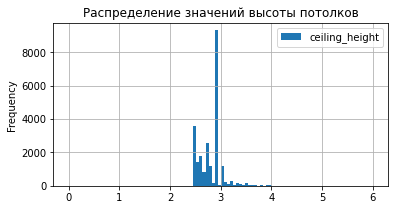

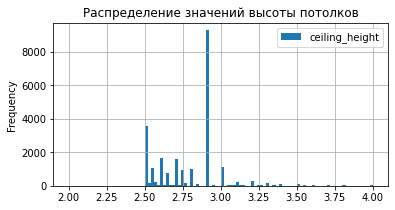

In [526]:
df.plot(y='ceiling_height', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0, 6), title='Распределение значений высоты потолков')
df.plot(y='ceiling_height', kind='hist', bins=100, grid=True, figsize=(6,3), range=(2, 4), title='Распределение значений высоты потолков')
df['ceiling_height'].describe()

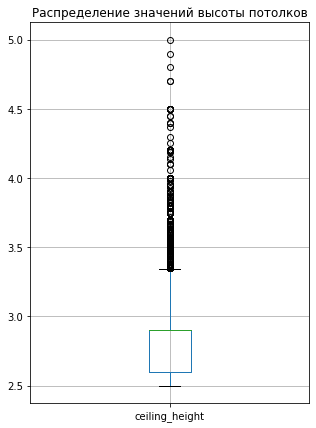

In [527]:
df.boxplot('ceiling_height', figsize=(5, 7)).set_title('Распределение значений высоты потолков');

Значения распределены от 2.5 до 5, что удовлетворяет требованиям СНиПа. Самый частовыбираемый вариант - потолок в 2.9м. Выбросы не найдены.

#### Тип этажа квартиры

In [528]:
df.groupby('floor_category')['floor_category'].count().sort_values()

floor_category
первый        2899
последний     3304
другой       17358
Name: floor_category, dtype: int64

Какь ожидалось, этажи, отличные от первых и последних, являются самой многочисленной группой.

#### Общее количество этажей в доме

count    23475.000000
mean        10.679617
std          6.597095
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

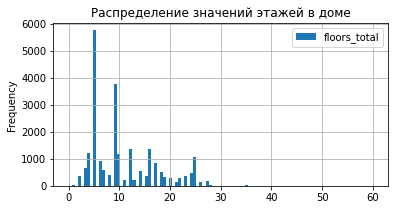

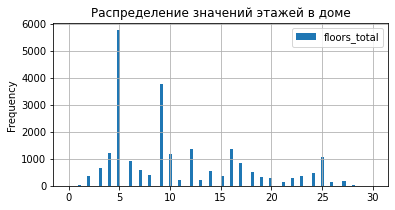

In [529]:
df.plot(y='floors_total', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0,60), title='Распределение значений этажей в доме')
df.plot(y='floors_total', kind='hist', bins=100, grid=True, figsize=(6,3), range=(0,30), title='Распределение значений этажей в доме')
df['floors_total'].describe()

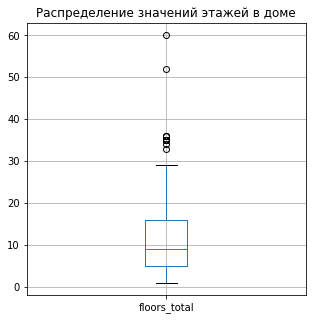

In [530]:
df.boxplot('floors_total', figsize=(5, 5)).set_title('Распределение значений этажей в доме');

Высота домов являются целыми значениями и варьируется в пределах от 1 до 60. При этом дома с количетсвом этажей больше 40 насчитывают только 2 примера и поэтому выглядят, как аномалии. Удалим их.

In [531]:
df.drop(index=df.query('floors_total > 40').index, inplace=True)
df['floors_total'].describe()

count    23473.000000
mean        10.675755
std          6.583994
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

#### Расстояние до центра города в метрах

count    18079.000000
mean     14197.057912
std       8607.681661
min        181.000000
25%       9241.000000
50%      13107.000000
75%      16294.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

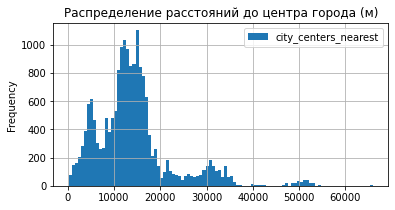

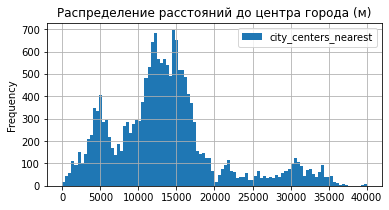

In [532]:
df.plot(y='city_centers_nearest', kind='hist', bins=100, grid=True, figsize=(6,3), title='Распределение расстояний до центра города (м)')
df.plot(y='city_centers_nearest', kind='hist', bins=100, range=(0, 40000), grid=True, figsize=(6,3), title='Распределение расстояний до центра города (м)')
df['city_centers_nearest'].describe()

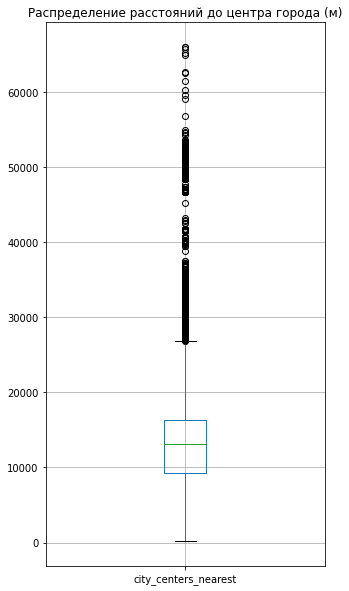

In [533]:
df.boxplot('city_centers_nearest', figsize=(5, 10)).set_title('Распределение расстояний до центра города (м)');

Представлены квартиры, расположенные как в 200 метрах от центра города, так и те, что находятся на окраине, на удалении 60км от центра. Выбросы не найдены. Однако чаще попадаются квартиры, расположенные на расстоянии от 10км до 20км от центра города.

#### Расстояние до ближайшего парка

count    8019.000000
mean      490.701459
std       342.729786
min         1.000000
25%       287.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

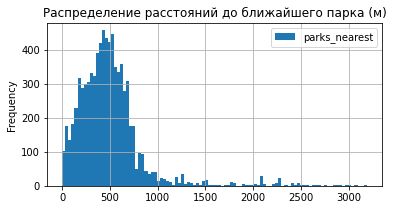

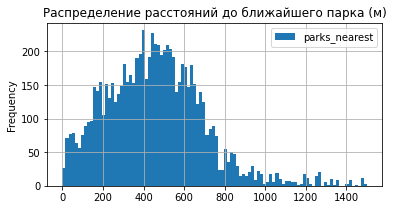

In [534]:
df.plot(y='parks_nearest', kind='hist', bins=100, grid=True, figsize=(6,3), title='Распределение расстояний до ближайшего парка (м)')
df.plot(y='parks_nearest', kind='hist', bins=100, range=(0, 1500), grid=True, figsize=(6,3), title='Распределение расстояний до ближайшего парка (м)')
df['parks_nearest'].describe()

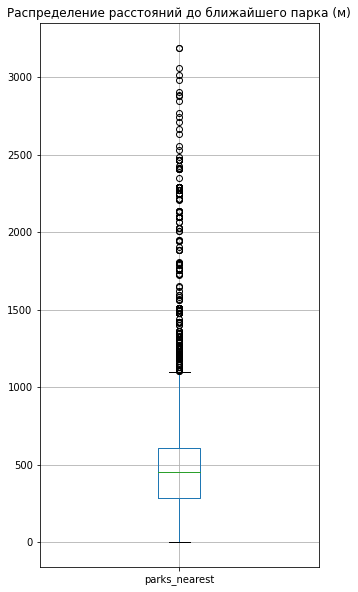

In [535]:
df.boxplot('parks_nearest', figsize=(5, 10)).set_title('Распределение расстояний до ближайшего парка (м)');

Представлены квартиры, расположенные как в 1 метре от парка, так и те, что находятся на удалении 3км от парков. Выбросы не найдены. Однако чаще попадаются квартиры, расположенные на расстоянии от 300м до 800м от парка.

#### Изучим, как быстро продавались квартиры (столбец days_exposition)

count    20395.000000
mean       181.019711
std        219.892538
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

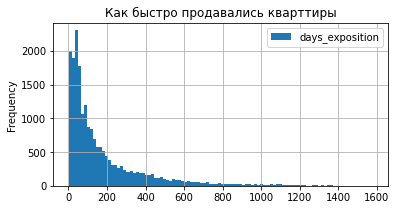

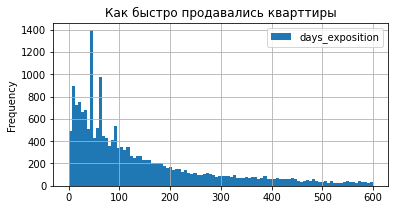

In [536]:
df.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(6,3), title='Как быстро продавались кварттиры')
df.plot(y='days_exposition', kind='hist', bins=100, range=(0, 600), grid=True, figsize=(6,3), title='Как быстро продавались кварттиры')
df['days_exposition'].describe()

In [537]:
print('10 дней:', df[df['days_exposition'] <= 10]['days_exposition'].count())
print('1 месяц:', df[df['days_exposition'] <= 30]['days_exposition'].count())
print('3 месяца:', df[df['days_exposition'] <= 90]['days_exposition'].count())
print('1 год:', df[df['days_exposition'] <= 365]['days_exposition'].count())
print('Больше года:', df[df['days_exposition'] > 365]['days_exposition'].count())

10 дней: 1251
1 месяц: 3721
3 месяца: 9666
1 год: 17346
Больше года: 3049


По данным видно, что пятая часть всех квартир была распродана в первые 10 дней после выставления объявления. Однако, все-таки более вероятно, что квартира будет выкуплена в первые 3 месяца, так как медианное значение равно 74 дням (среднее в данном случае составляет 156 дней (примерно 4 месяца)). Заметим, что за 1 год была распродана большая часть квартир (20000 из 23500). И лишь продажа немногих 3000 была растянута больше, чем на год. Следовательно, быстрой продажей можно считать покупку квартиры за первые две недели. При этом необычно долгие продажи длятся больше года.

 #### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

Посчитаем корреляцию цены с каждым фактором.

In [538]:
factors = ['total_area', 'living_area', 'kitchen_area', 'rooms']

for item in factors:
    correlation = df['last_price'].corr(df[item])
    print(f'Корреляция между last_price и {item} составляет: {correlation: 0.2}')

Корреляция между last_price и total_area составляет:  0.71
Корреляция между last_price и living_area составляет:  0.61
Корреляция между last_price и kitchen_area составляет:  0.53
Корреляция между last_price и rooms составляет:  0.4


Text(0.5, 0, 'last_price')

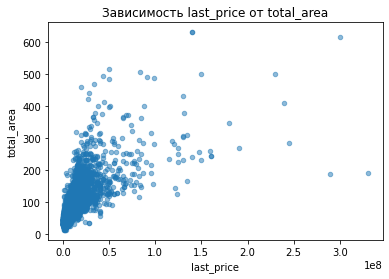

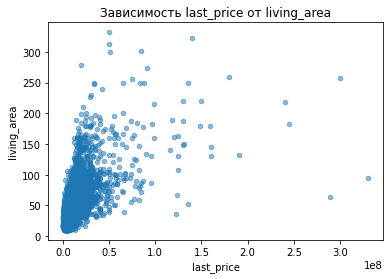

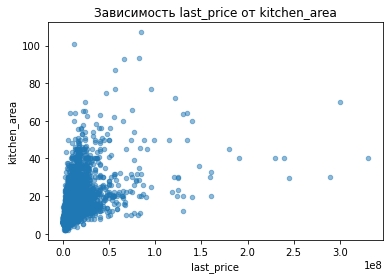

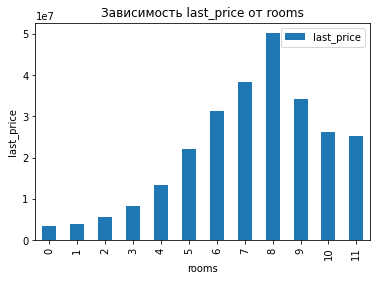

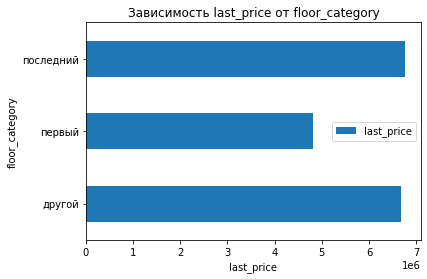

In [539]:
df.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5, title='Зависимость last_price от total_area');
df.plot(x='last_price', y='living_area', kind='scatter', alpha=0.5, title='Зависимость last_price от living_area');
df.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.5, title='Зависимость last_price от kitchen_area');
f = df.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar', title='Зависимость last_price от rooms');
f.set_xlabel('rooms');
f.set_ylabel('last_price');
t = df.pivot_table(index='floor_category',values='last_price').plot(y='last_price', kind='barh', title='Зависимость last_price от floor_category');
t.set_xlabel('last_price')

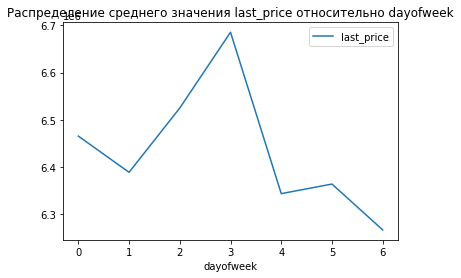

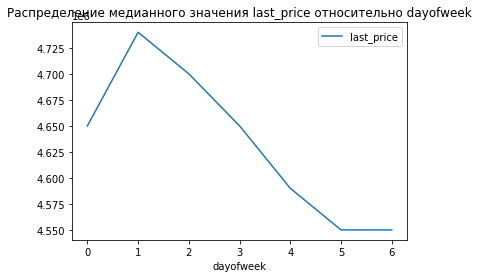

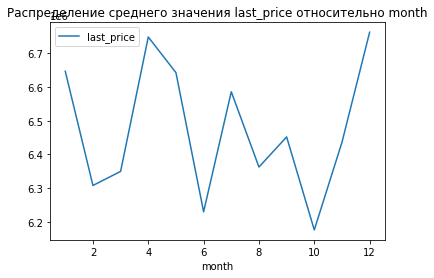

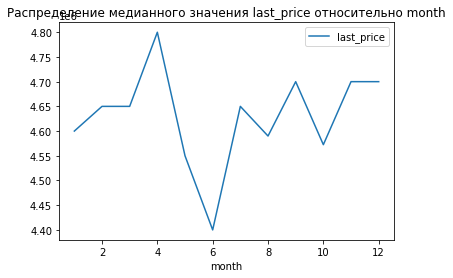

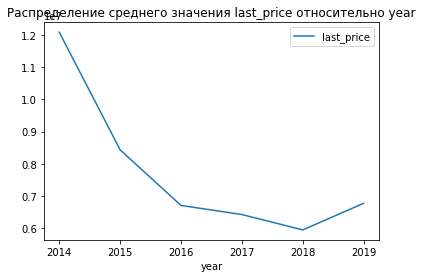

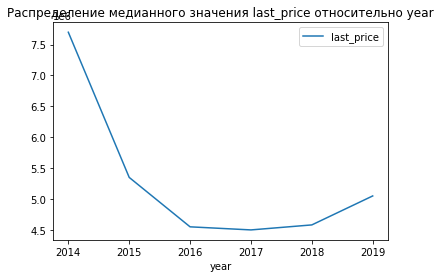

In [540]:
df.pivot_table(index='dayofweek', values='last_price', aggfunc='mean').plot(y='last_price', kind='line', title='Распределение среднего значения last_price относительно dayofweek');
df.pivot_table(index='dayofweek', values='last_price', aggfunc='median').plot(y='last_price', kind='line', title='Распределение медианного значения last_price относительно dayofweek');

df.pivot_table(index='month', values='last_price', aggfunc='mean').plot(y='last_price', kind='line', title='Распределение среднего значения last_price относительно month');
df.pivot_table(index='month', values='last_price', aggfunc='median').plot(y='last_price', kind='line', title='Распределение медианного значения last_price относительно month');

df.pivot_table(index='year', values='last_price', aggfunc='mean').plot(y='last_price', kind='line', title='Распределение среднего значения last_price относительно year');
df.pivot_table(index='year', values='last_price', aggfunc='median').plot(y='last_price', kind='line', title='Распределение медианного значения last_price относительно year');

Вывод: <br> Цена зависит от (по убыванию важности):<br>
общей площади;<br>
жилой площади;<br>
площади кухни;<br>
количества комнат.<br>
<br>
Цена практически на зависит от:<br>
этажа, на котором расположена квартира;<br>
даты размещения.<br>
<br>
Коэффициенты корреляции показали, что между last_price и total_area, living_area, kitchen_area, rooms существует линейная зависимость. Другими словами, если увеличивается total_area, или living_area,или kitchen_area, или rooms, то увеличивается и итоговая цена квартиры. Наибольшее влияние оказывает параметр total_area(общая площадь квартиры), так как коэффициент корреляции между ним и ценой достигает значения 0.7. Наименьшее влияние имеет количество комнат - 0.4. <br>

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [544]:
top_10 = df.pivot_table(index = 'locality_name', values = 'cost_per_sqm', aggfunc=['count', 'mean'])
top_10.columns = ['count', 'mean']
top_10 = top_10.sort_values('count', ascending = False).head(10)
top_10

,count,mean
locality_name,,
санкт-петербург,15634,114536.385699
поселок мурино,554,85624.246498
поселок шушары,439,78703.263349
всеволожск,397,68719.320378
пушкин,366,103147.825574
колпино,337,75443.972849
поселок парголово,325,90175.286215
гатчина,307,68746.146515
деревня кудрово,297,92425.925286


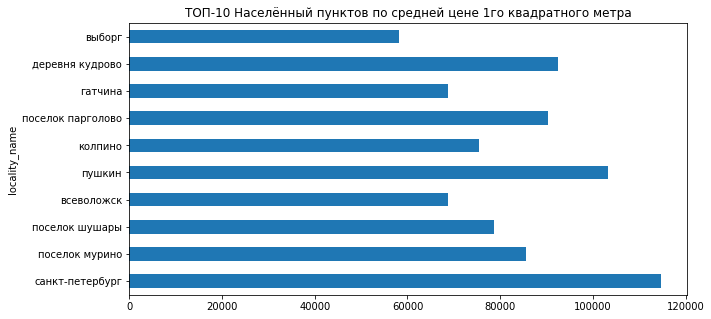

In [545]:
top_10['mean'].plot(kind='barh', title='ТОП-10 Населённый пунктов по средней цене 1го квадратного метра', figsize=(10,5));

Вывод: <br>
Среди десяти городов с наибольших количеством заявлений самая дорогая недвижимость находится в Санкт-Петербурге. Пушкин и Деревня Кудрово занимают 2 и 3 места соответственно. Последнее место из первой десятки занимает Выборг.

#### Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим их среднюю стоимость на разном удалении от центра

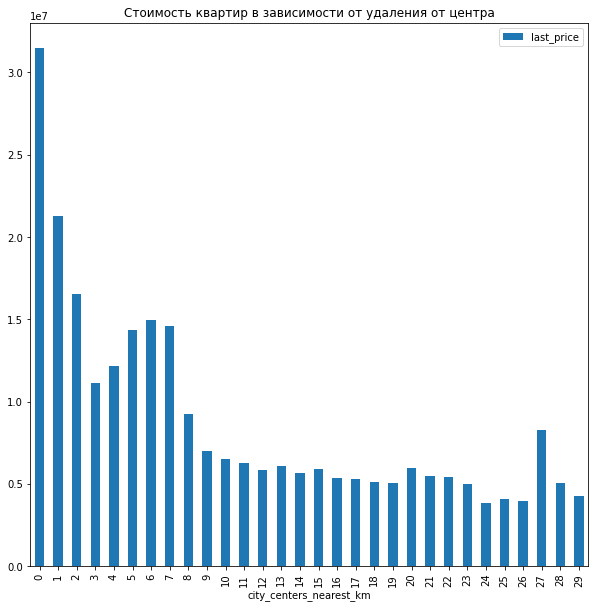

In [543]:
df[df['locality_name']=='санкт-петербург'].pivot_table(index='city_centers_nearest_km',
                                                        values='last_price',
                                                        aggfunc='mean').plot(kind='bar', figsize=(10,10), 
                                                                             title='Стоимость квартир в зависимости от удаления от центра');


Вывод: <br>
Самой дорогой является недвижимость расположенная в радиусе 1 км от центра. Цена резко идет на спад в промежутке от 1 до 3 км включительно. Далее цена начинает расти, достигая пика на удалении 6 км, но не превышая цена на расстоянии 2 км. Далее цена сохраняет близкое к предыдущему значение на расстоянии 7 км. Но потом опускается вдвое, продолжая колеблебаться на одном уровне до отметки в 27 км. Небольшой рост в цене, схожий со значением на 8 км. Однако от 28 км цена возвращается к прежним значениям. <br> <br>
Самый дорогой район рассположен от 0 до 1 км от центра. <br>
Самый дешевый район - на удалении 24 км от центра.

### Напишите общий вывод

Общая работа: <br>
Была выполнена предобработка данных. Исправлены типы данных, заполнены, по возможности, нулевые значения, выявлены дубликаты, удалены выбросы(к этому этапу возвращались при исследовательском анализе данных, так как некоторые выбросы были неочевидны на момент предобработки данных). Дабавлены 6 новых столбцов(описаны в чек-листе). Проанализирован ряд основных параметров на предмет значений. <br>
<br> Итоги исследовательского анализа данных: <br>
1. В среднем квартиры, выставленные на продажу продаются за первые 70-150 дней (3-4 месяца). Квартиры, продающиеся больше года являются необычным явлением.
2. На итоговую стоимость квартиры в большей мере влияют 4 фактора: общая площадь; жилая площадь; площадь кухни; количество комнат. На цену практически не влияют: этаж, на котором расположена квартира; дата размещения.
3. Самые дорогие квартиры (по цене за 1 кв.м) располагаются в Санкт-Петербурге и близким к нему городам: Пушкин и Деревня Кудрово. В работе представлен ТОП-10 городов с наибольшим количеством объявлений.
4. Если ограничиваться только Питером, то самые дорогие квартиры находятся в центре города (в радиусе 1 км от центра). При этом на удалении 27 км располагаются квартиры схожие в стоимости с квартирами на расстоянии 8 км. Видимо, по качеству квартиры схожи.